In [99]:
# Imports 

# Basic tools
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

# selection, processing
from sklearn.feature_selection import SelectKBest, SelectPercentile, chi2
from sklearn.model_selection import GridSearchCV
from sklearn import ensemble
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB 
from sklearn.linear_model import Ridge, Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.svm import SVC

# metrics
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn.metrics import classification_report
import time
from collections import Counter

import warnings
warnings.filterwarnings('ignore') # Ignore all warnings

In [3]:
# Load and preview data
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
pd.options.display.max_columns = 50

In [4]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
# Variable names 
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

### About the Data

This data set provides information about a telecom company's customer behavier which can be analysez to identify who is leaving the business and why they are leaving.

The data set has 7043 rows and 21 columns. Each row represents a customer, each column contains customer’s attributes as described below.
<li>Customer ID: Customer ID</li>
<li>Gender: Customer gender (female, male)</li>
<li>SeniorCitizen: Whether the customer is a senior citizen or not (1, 0)</li>
<li>Partner: Whether the customer has a partner or not (Yes, No)</li>
<li>Dependents: Whether the customer has dependents or not (Yes, No)</li>
<li>tenure: Number of months the customer has stayed with the company</li>
<li>PhoneService: Whether the customer has a phone service or not (Yes, No)</li>
<li>MultipleLines: Whether the customer has multiple lines or not (Yes, No, No phone service)</li>
<li>InternetService: Customer’s internet service provider (DSL, Fiber optic, No)</li>
<li>OnlineSecurity: Whether the customer has online security or not (Yes, No, No internet service)</li>
<li>OnlineBackup: Whether the customer has online backup or not (Yes, No, No internet service)</li>
<li>DeviceProtection: Whether the customer has device protection or not (Yes, No, No internet service)</li>
<li>TechSupport: Whether the customer has tech support or not (Yes, No, No internet service)</li>
<li>StreamingTV: Whether the customer has streaming TV or not (Yes, No, No internet service)</li>
<li>StreamingMovies: Whether the customer has streaming movies or not (Yes, No, No internet service)</li>
<li>Contract: The contract term of the customer (Month-to-month, One year, Two year)</li>
<li>PaperlessBilling: Whether the customer has paperless billing or not (Yes, No)</li>
<li>PaymentMethod: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))</li>
<li>MonthlyCharges: The amount charged to the customer monthly</li>
<li>TotalCharges: The total amount charged to the customer</li>
<li>Churn: Whether the customers has left within the last month or not (Yes, No)</li>


The data set is available [HERE](https://www.kaggle.com/blastchar/telco-customer-churn)

### The Goal

The Goal of this data analysis project is to identify who is leaving the business and the reasons behind that. We will also try to provide recommendations for reducing customer churn based on our findings. 

### Cleaning the Data

In [6]:
# Check shape and data types 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

There are no missing values in the data frame. We have three continious variables and the rest are categorical variables most of which have binary values. 'SeniorCitizen' should be categorical variable as it only indicates whether the customer is a senior citizen or not. 'TotalCharges' should be converted to numeric data type.  The Customer ID column has no valuable information and can just be dropped.  

In [7]:
# Convert SeniorCitizen to Categorical data type
data['SeniorCitizen'] = data['SeniorCitizen'].astype('object')

# Convert TotalCharges to numeric
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors = 'coerce')

# Drop unwanted column
data = data.drop('customerID', 1)
data.dtypes

gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [8]:
# Check for missing data after conversion
data.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

The data type conversion above created NaN values because values which can't be converted to numeric are recorded as NaN values by The errors = 'coerce' parameter we used. Since the number of columns with NaN values is too small, we'll go ahead and drop them without loosing information. 

In [9]:
data = data.dropna()

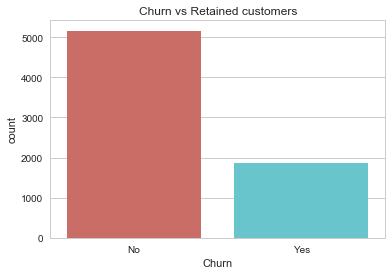

No     5163
Yes    1869
Name: Churn, dtype: int64


In [10]:
sns.countplot(x='Churn', data=data, palette='hls')
plt.title('Churn vs Retained customers')
plt.show()
print(data['Churn'].value_counts())

Out of the 7032 customers, 1869 (26.5%) have left the business and the rest 5163 are retained. 

## Data Exploration

### Continious Variables 

In [11]:
# Statistical summary for whode data set 
data.describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


We can see that the average tenure of customers is 32.42 months which is more than the median tenure. The monthly and total charges also have average values higher than the median value. 

By contrast, customers who leave the business have an average tenure of 18 months and they pay $10 more on monthly charges than the total customer average and about $13 more than retained customers as shown in the tables below. This indicates that customers might be leaving for a better price deal and at the same time it reflects any underlining rewards for loyal customers. 

In [12]:
# Statistical summary for churn customers  
data[data['Churn'] == 'Yes'].describe()

,tenure,MonthlyCharges,TotalCharges
count,1869.000000,1869.000000,1869.000000
mean,17.979133,74.441332,1531.796094
std,19.531123,24.666053,1890.822994
min,1.000000,18.850000,18.850000
25%,2.000000,56.150000,134.500000
50%,10.000000,79.650000,703.550000
75%,29.000000,94.200000,2331.300000
max,72.000000,118.350000,8684.800000


In [13]:
# Statistical summary for retained customers 
data[data['Churn'] == 'No'].describe()

,tenure,MonthlyCharges,TotalCharges
count,5163.00000,5163.000000,5163.000000
mean,37.65001,61.307408,2555.344141
std,24.07694,31.094557,2329.456984
min,1.00000,18.250000,18.800000
25%,15.00000,25.100000,577.825000
50%,38.00000,64.450000,1683.600000
75%,61.00000,88.475000,4264.125000
max,72.00000,118.750000,8672.450000


It can be infered from the tables above and the graph below that tenure and monthly charges are good estimators of churn behavior. The churn customer group is represented mostly by those who have a short tenure but pay more than the other group. 

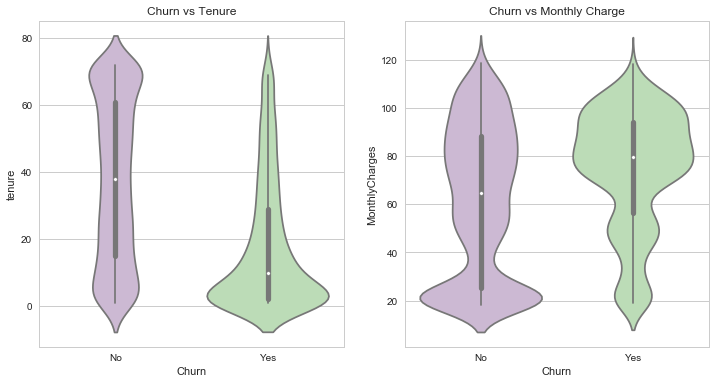

In [14]:
# Visualize relation betwwn churn and continious variables
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.violinplot(x='Churn', y='tenure',
                 data=data, palette='PRGn')
plt.title('Churn vs Tenure')

plt.subplot(1,2,2)
sns.violinplot(x='Churn', y='MonthlyCharges',
                 data=data, palette='PRGn')
plt.title('Churn vs Monthly Charge')

plt.show()

Unsurprisingly, the longer the customer stays with the company, the more revenue the company generates and the relation between the two is a linear one as shown below. 

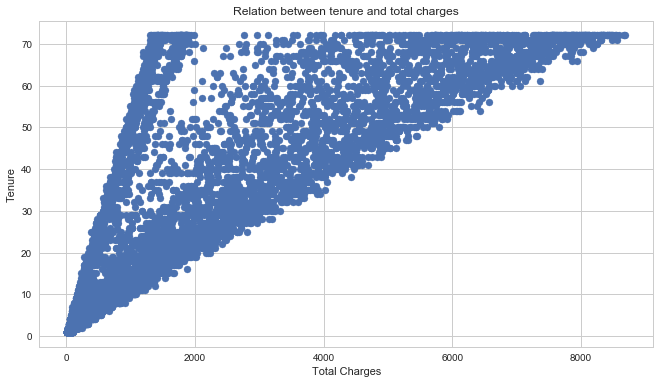

In [15]:
# Tenure vs total charge 
plt.figure(figsize=(11,6))
plt.scatter(x=data['TotalCharges'], y=data['tenure'])
plt.xlabel('Total Charges')
plt.ylabel('Tenure')
plt.title('Relation between tenure and total charges')
plt.show()

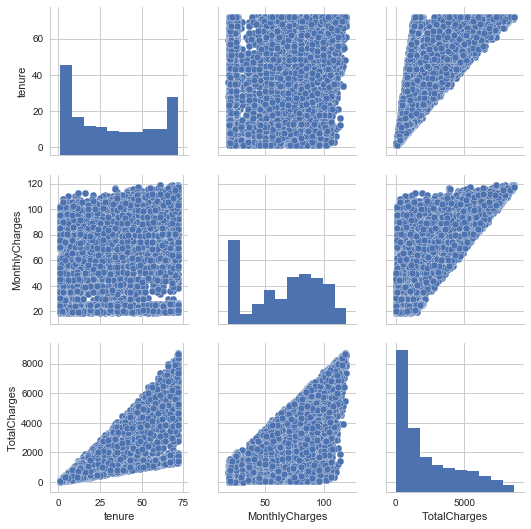

In [16]:
# pairwise plots
continous = data[['tenure', 'MonthlyCharges', 'TotalCharges']]
sns.pairplot(continous)
plt.show()

From the distribution of the tenure variable in the right left corner of the plot above, we can see that there is a high number of customers with only few months of tenure. We have seen in previous analysis that most of the cusomers who left the business happen to the ones who stayed with the company the shortest. Understanding this group of customers is important for reducing the churn rate. Monthly charges are higher for newer customers. 

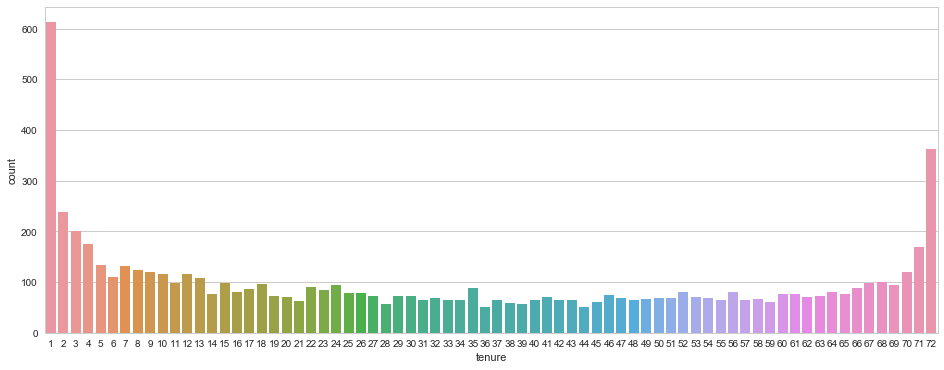

In [17]:
# Distribution of tenure
plt.figure(figsize = (16,6))
sns.countplot(data['tenure'])

Text(0.5,1,'Correlation')

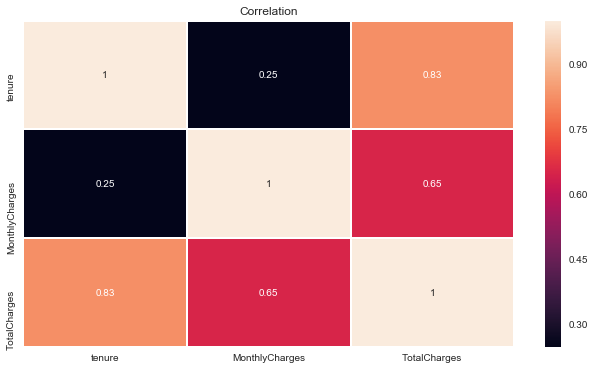

In [18]:
# Visualize correlations between continious variables
plt.figure(figsize=(11,6))
sns.heatmap(data.corr(),linewidth = 1,annot= True)
plt.title('Correlation')

TotalCharge is the product of MontlyCharges and tenure. As a result it is highly correlated with the other two. We will drop the TotalCharge variable when building our models later to avoid overfitting. MonthyCharges and tenure have a low colinearity with eachother and they are suitable for modeling. 

### Categorical Variables 

In [19]:
# Quick summary 
data.describe(include = 'object')

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3549,5890,3639,4933,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365,5163


From the table above, we can observe that:
<ul>
<li>Male and female customers are almost evenly represented </li>
<li>Senior citizens make up the minority of customer groups</li>
<li>Most customers have Phone services and about half have multiple lines</li>
<li>Electronic check is the most prefered payment method, and</li>
<li>Customers prefer paperless billing and month-to-month contracts</li>
</ul>

In [21]:
# Categorical variables 
categorical = data.select_dtypes(include='object')
categorical.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


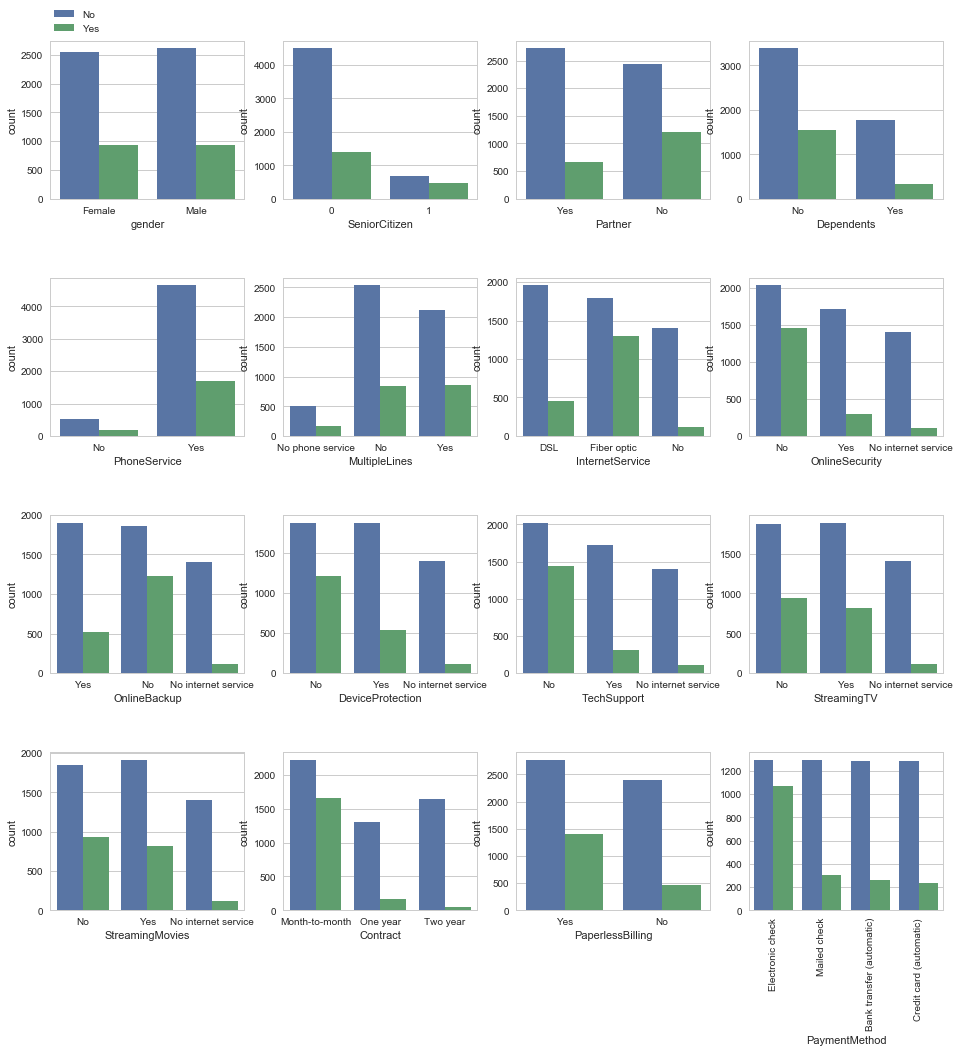

In [22]:
fig,ax =plt.subplots(4,4,figsize=(16,16))
fig.subplots_adjust(hspace=.5)
for i in range(0,16):
    g = sns.countplot(x=categorical.iloc[:,i], hue=categorical['Churn'], ax=ax[divmod(i,4)])
    g.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, mode="expand", borderaxespad=0.) if i==0 else g.legend_.remove()
for tick in ax[3,3].get_xticklabels():
    tick.set_rotation(90)

From the graph above we can observe that customer churn is higher in the following group of customers or with the following attributes:
<ul>
    <li>Senior citizens</li>
    <li>Customers who do not have partners</li>
    <li>Customers who do not have dependents</li>
    <li>Customers who have fiber optics internet service</li>
    <li>Customers who do not have either of online security, online backup, device protection, or tech support</li>
    <li>Customers who use Electronic check as a payment method</li>
</ul>

Let's take a closer look at some of these categories and their relation with the continious variables. 

In [23]:
# Subset of the data frame with only churn records 
data_churn = data[data.Churn == 'Yes']
data_churn.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
13,Male,0,No,No,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes


<b>Senior Citezens</b>

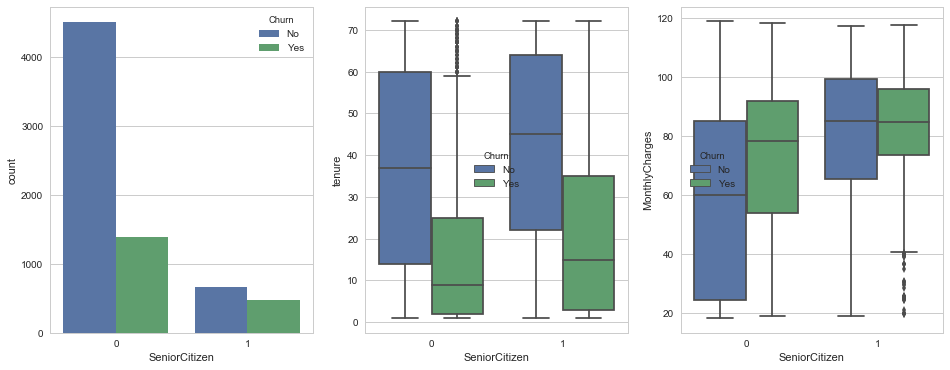

In [24]:
# Examining senior citizens 
plt.figure(figsize=(16,6))
plt.subplot(1,3,1)
sns.countplot(data.SeniorCitizen, hue = data.Churn)

plt.subplot(1,3,2)
sns.boxplot(x=data.SeniorCitizen, y=data.tenure, hue=data.Churn)

plt.subplot(1,3,3)
sns.boxplot(x=data.SeniorCitizen, y=data.MonthlyCharges, hue=data.Churn)
plt.show()

In [25]:
# Calculate the churn rate among senior  
senior_count = data['SeniorCitizen'].value_counts().tolist()
senior_churn = data_churn[data_churn.SeniorCitizen == 1]


In [26]:
# Total and churn 
print(senior_count)
print(senior_count[1])
print(len(senior_churn))
print('Amount of senior citizens leaving is:{}%'.format(len(senior_churn)/senior_count[1]*100))

[5890, 1142]
1142
476
Amount of senior citizens leaving is:41.68126094570928%


The churn rate for senior citezens is 41.68%  which is much higher than the total churn rate of 26.5%. The ones who leave also have a shorter tenure and overall senior citezens pay higher monthly charges than the rest of the customers. 

<b>Customers who do not have partners</b>

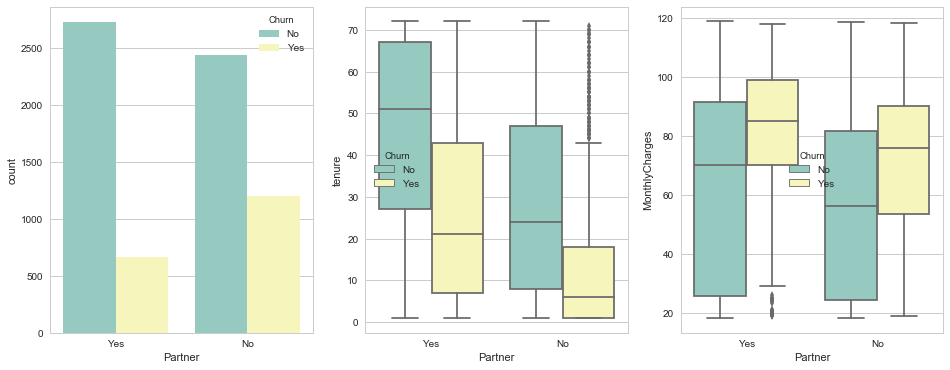

In [27]:
# Examining customers who do not have partners 
plt.figure(figsize=(16,6))
plt.subplot(1,3,1)
sns.countplot(data.Partner, hue = data.Churn, palette="Set3")

plt.subplot(1,3,2)
sns.boxplot(x=data.Partner, y=data.tenure, hue=data.Churn, palette="Set3")

plt.subplot(1,3,3)
sns.boxplot(x=data.Partner, y=data.MonthlyCharges, hue=data.Churn, palette="Set3")
plt.show()

In [28]:
# Calculate the churn rate among customers with no partners  
partner_count = data['Partner'].value_counts().tolist()
partner_churn = data_churn[data_churn.Partner == 'No']

# Total and churn 
print(partner_count[1])
print(len(partner_churn))
print('Churn rate for customers who do not have partners is:{}%'.format(len(partner_churn)/partner_count[0]*100))

3393
1200
Churn rate for customers who do not have partners is:32.97609233305853%


Customers who do not have partners have a churn rate of 32.97% which is higher than the overall rate of 26.5%. The diagrams show that this group has a much shorter tenure and they pay more monthly charge than the overall average of 64.79$. 

<b>Customers who do not have dependents</b>

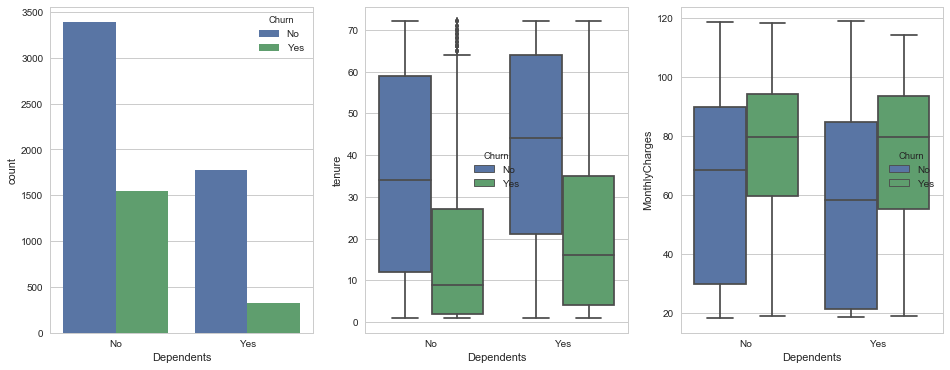

In [29]:
# Examining customers who do not have partners 
plt.figure(figsize=(16,6))
plt.subplot(1,3,1)
sns.countplot(data.Dependents, hue = data.Churn)

plt.subplot(1,3,2)
sns.boxplot(x=data.Dependents, y=data.tenure, hue=data.Churn)

plt.subplot(1,3,3)
sns.boxplot(x=data.Dependents, y=data.MonthlyCharges, hue=data.Churn)
plt.show()

In [30]:
# Calculate the churn rate among customers with no dependents  
dependent_count = data['Dependents'].value_counts().tolist()
dependent_churn = data_churn[data_churn.Dependents == 'No']

# Total and churn 
print(dependent_count[1])
print(len(dependent_churn))
print('Churn rate for customers who do not have dependents is:{}%'.format(len(dependent_churn)/dependent_count[0]*100))

2099
1543
Churn rate for customers who do not have dependents is:31.279140482465028%


The churn rate among customers who do not have dependents is higher than the overall average. They also pay more than the overall average fee and have shorter tenure.

<b>Customers who have fiber optics internet service</b>

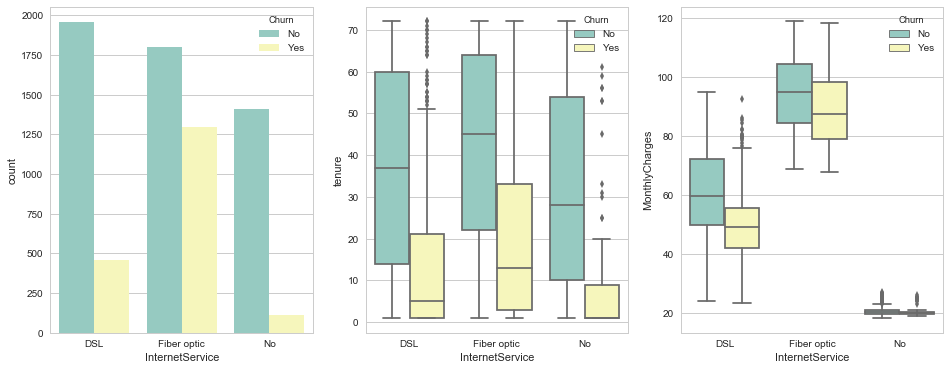

In [31]:
# Examining customers who do not have partners 
plt.figure(figsize=(16,6))
plt.subplot(1,3,1)
sns.countplot(data.InternetService, hue = data.Churn, palette="Set3")

plt.subplot(1,3,2)
sns.boxplot(x=data.InternetService, y=data.tenure, hue=data.Churn, palette="Set3")

plt.subplot(1,3,3)
sns.boxplot(x=data.InternetService, y=data.MonthlyCharges, hue=data.Churn, palette="Set3")
plt.show()

In [32]:
# Calculate the churn rate among customers with fiber optics internet service  
fiber_count = data['InternetService'].value_counts().tolist()
fiber_churn = data_churn[data_churn.InternetService == 'Fiber optic']

# Total and churn 
print(fiber_count[0])
print(len(fiber_churn))
print('Churn rate for customers who have Fiber optics internet service is:{}%'.format(len(fiber_churn)/fiber_count[0]*100))

3096
1297
Churn rate for customers who have Fiber optics internet service is:41.89276485788114%


In [33]:
print(fiber_count)

[3096, 2416, 1520]


Customers who have fiber optics internet service have a high churn rate of 42% which is again much larger than the overall rate of 26.5%. This churn group is also characterized by lower than average tenure and higher than average monthly charge. Since the churn rate is very high, it needs further investigation. 

<b>Customers who use Electronic Check as a payment method</b>

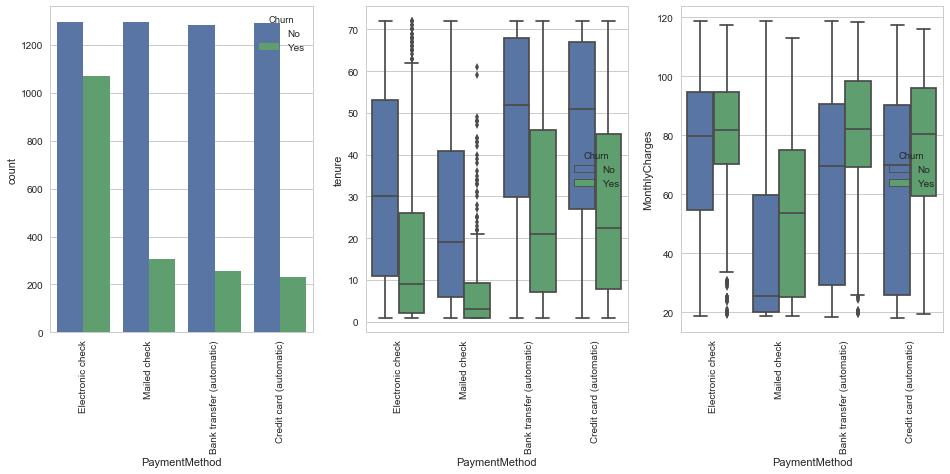

In [34]:
# Examining customers who use electronic check as a payment method  
plt.figure(figsize=(16,6))
plt.subplot(1,3,1)
sns.countplot(data.PaymentMethod, hue = data.Churn)
plt.xticks(rotation=90)

plt.subplot(1,3,2)
sns.boxplot(x=data.PaymentMethod, y=data.tenure, hue=data.Churn)
plt.xticks(rotation=90)

plt.subplot(1,3,3)
sns.boxplot(x=data.PaymentMethod, y=data.MonthlyCharges, hue=data.Churn)
plt.xticks(rotation=90)
plt.show()

In [35]:
print(data['PaymentMethod'].value_counts())

Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: PaymentMethod, dtype: int64


In [36]:
# Calculate the churn rate among customers with no dependents  
e_check_count = data['PaymentMethod'].value_counts().tolist()
e_check_churn = data_churn[data_churn.PaymentMethod == 'Electronic check']

# Total and churn 
print(e_check_count[0])
print(len(e_check_churn))
print('Churn rate for customers who use Electronic check as payment method is:{}%'.format(len(e_check_churn)/e_check_count[0]*100))

2365
1071
Churn rate for customers who use Electronic check as payment method is:45.28541226215645%


Customers who use Electronic check as a payment method have a 45% churn rate which is much higher than the 26.5% total average. The graph shows considerable differences in the churn proportion with the other three payment methods. This group also has lower than average tenure and higher monthly charge than the whole average.   

## Modeling

The following supervised learning models will be used to predict customer churn
<ul>
    <li>Naive Bayes Bernoulli Classifier</li>
    <li>K-nearest neighbors (KNN)</li>
    <li>logistics Regression</li>
    <li>Ridge Classifier</li>
    <li>Lasso (Logistics regression with L1 regularization parameter)</li>
    <li>Decision Tree Classifier</li>
    <li>Random Forest</li>
    <li>Support Vector Classifier (SVC)</li>
    <li>Gradient Boost Classification</li>
</ul>

We will use a 70/30 train-test split for trainig and testing phases. We will use Principal Component Analysis (PCA) and SelectKbest methods to reduce the dimentionality and GridSearchCV for tuning parameters. 

<b>Evaluation</b>

We will use accuracy score, confusion matrix, classification report, and AUC (Area Under the Curve), and run time to evaluate the models. We'll compare scores for both training and test. Ideally, we want the test set score to be just a little lower than the training set score. A bigger difference shows overfitting. 

AUC curve is generated by ploting true positive rates on the y-axis against false positive rates on the x-axis. A model with AUC value of 0.5 for a binary classification is the same as randomly guessing the outcome. A model with AUC value closer to 1 is a good model.


We have seen earlier that the gender variable is not a good indicator since the churn rate is the same for both female and male values. So we can go ahead and drop it. 

In [37]:
# Drop gender and confirm change
data = data.drop('gender',1)
data.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Handling categorical variables 

The data set is mostly comprised of categorical variables. Machine learning algorithms require all variables to be numeric. We will use pands get_dummies method to create dummy variables with binary representation of each value in the categorical variables. Lebel encoding is another option to handle categorical data but, since the values do not have ordinal relationship, the models might result in a poor result.

In [38]:
# Print values in each category
categorical = data.select_dtypes(include=['object'])
for i in categorical:
    column = categorical[i]
    print(i)
    print(column.unique())

SeniorCitizen
[0 1]
Partner
['Yes' 'No']
Dependents
['No' 'Yes']
PhoneService
['No' 'Yes']
MultipleLines
['No phone service' 'No' 'Yes']
InternetService
['DSL' 'Fiber optic' 'No']
OnlineSecurity
['No' 'Yes' 'No internet service']
OnlineBackup
['Yes' 'No' 'No internet service']
DeviceProtection
['No' 'Yes' 'No internet service']
TechSupport
['No' 'Yes' 'No internet service']
StreamingTV
['No' 'Yes' 'No internet service']
StreamingMovies
['No' 'Yes' 'No internet service']
Contract
['Month-to-month' 'One year' 'Two year']
PaperlessBilling
['Yes' 'No']
PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn
['No' 'Yes']


The SeniorCitezen variable is represented with binary digits. Let's replace that with 'Yes' and 'No' strings so that when we create dummy variables, it will be represented with two columns properly. We will do the opposite for 'Churn' variable since it's our target variable and we want a binary representation in the same column. 

In [39]:
# encode 0 for No and 1 for Yes
data['SeniorCitizen'] = data['SeniorCitizen'].replace(0, 'No')
data['SeniorCitizen'] = data['SeniorCitizen'].replace(1, 'Yes')
data['Churn'] = data['Churn'].replace(['No'], 0)
data['Churn'] = data['Churn'].replace(['Yes'], 1)

In [40]:
# Confirm Changes 
data.tail()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,No,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
7039,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0
7040,No,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1
7042,No,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.50,0


## Fixing Class Imbalance 

As we have seen earlier, there is a class imbalance in the outcome variable which would make the accuracy scores unreliable if left unfixed.  

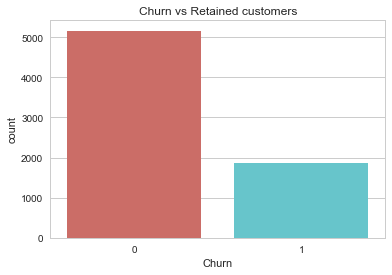

0    5163
1    1869
Name: Churn, dtype: int64


In [41]:
sns.countplot(x='Churn', data=data, palette='hls')
plt.title('Churn vs Retained customers')
plt.show()
print(data['Churn'].value_counts())

We will resample the data by upsampling the minority group and downsampling the majority group. Up sampling works by randomly replicating records from the minority group and this is not an idea representation of population. We will limit the number of samples to 4000 observations to limit overfitting. Down sampling also causes information loss. 

Note: (The 4000 sample size is chosen mainly to keep the data set within the computational capacity of the computer used for modeling) 

1    4000
0    4000
Name: Churn, dtype: int64
We now have a sample with balanced class


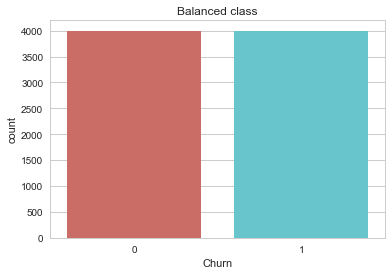

In [45]:
#Import module and resampling 

from sklearn.utils import resample

# Separate majority and minority classes
data_majority = data[data.Churn==0]
data_minority = data[data.Churn==1]
 
# Downsample majority overall class
data_minority_upsampled = resample(data_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples=4000,     # new sample size
                                 random_state=123) # reproducible results

data_majority_downsampled = resample(data_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=4000,     # new sample size
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority overall class
data_resampled = pd.concat([data_minority_upsampled, data_majority_downsampled])
 
# Display new class counts
print(data_resampled.Churn.value_counts())
print('We now have a sample with balanced class')

sns.countplot(x='Churn', data=data_resampled, palette='hls')
plt.title('Balanced class')
plt.show()

### Dependent and Independent Variables

In [46]:
# define target and predictor variables and get dummies
X = data_resampled.drop('Churn', 1)
Y = data_resampled['Churn']
X = pd.get_dummies(X)


In [47]:
# a lot of columns
X.shape

(8000, 44)

In [48]:
# preview
X.head()

,tenure,MonthlyCharges,TotalCharges,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5812,1,71.00,71.00,1,0,0,1,0,1,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
5306,19,83.65,1465.75,1,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,1,0
5368,3,70.30,235.50,0,1,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
5125,11,94.00,1078.90,1,0,0,1,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0
4273,31,79.85,2404.15,1,0,1,0,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0


In [49]:
#Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

## Models

## 1. Bernoulli Naive Bayes Classifier

[0.7025  0.7025  0.685   0.725   0.69875 0.69    0.7025  0.69875 0.675
 0.705  ]
Training set score: 0.6944642857142858

Test set score: 0.7108333333333333
             precision    recall  f1-score   support

          0       0.73      0.66      0.69      1194
          1       0.69      0.76      0.73      1206

avg / total       0.71      0.71      0.71      2400

Confusion matrix
[[788 406]
 [288 918]]


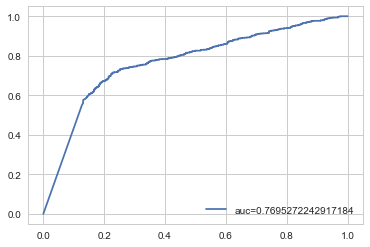


Runtime: 0.25 seconds


In [50]:
# bernoulli
start_time = time.clock()
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_Naive = mnb.predict(X_test)

# score
score_mnb = cross_val_score(mnb, X, Y, cv=10)
print(score_mnb)
print('Training set score:', mnb.score(X_train, y_train))
print('\nTest set score:', mnb.score(X_test, y_test))

# Classification report 
print(classification_report(y_test, y_Naive))

#Confusion matrix 
print('Confusion matrix')
print(confusion_matrix(y_test, y_Naive))

# AUC 
y_pred_proba = mnb.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label='auc='+str(auc))
plt.legend(loc=4)
plt.show()
print('\nRuntime: {} seconds'.format(round((time.clock()-start_time),2)))

Naive bayes works by calculating the probability of our target outcome based on the assumption that that the predicting variables are independent of each other. Typically there will be some dependence between variables in this data set or any other.In our data set, for example, having multiple lines might depend on whether or nor having a partner or dependents. Being a senior citizen might affect using paperless billing or not. 

The 71% accuracy and AUC value 0f 0.76 is reasonably good for the assumption made. This is also the model with the fastest run time.    

## 2. KNN Classifier (K-nearest neighbors)

[0.84    0.8425  0.8325  0.86375 0.82625 0.83625 0.8325  0.84625 0.84625
 0.85375]
Training set score: 0.9926785714285714

Test set score: 0.8379166666666666
             precision    recall  f1-score   support

          0       0.92      0.74      0.82      1194
          1       0.78      0.94      0.85      1206

avg / total       0.85      0.84      0.84      2400

Confusion matrix
[[ 883  311]
 [  78 1128]]


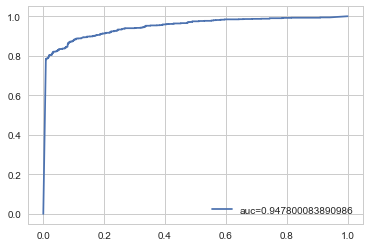


Runtime: 0.74 seconds


In [94]:
# Fit the data to knn model 
start_time = time.clock()
neigh = KNeighborsClassifier(n_neighbors=25, weights='distance')
neigh.fit(X_train, y_train)
y_knn = neigh.predict(X_test)

# score
score_neigh = cross_val_score(neigh, X, Y, cv=10)
print(score_neigh)
print('Training set score:', neigh.score(X_train, y_train))
print('\nTest set score:', neigh.score(X_test, y_test))

# Classification report 
print(classification_report(y_test, y_knn))

#Confusion matrix 
print('Confusion matrix')
print(confusion_matrix(y_test, y_knn))

# AUC 
y_pred_proba = neigh.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label='auc='+str(auc))
plt.legend(loc=4)
plt.show()
print('\nRuntime: {} seconds'.format(round((time.clock()-start_time),2)))

The model returns a training set score of 99.26% for a range of k values. The 84% test score along with low false positive and false negative rates is a good score but the difference between the training and test set scores suggests possible overfitting and inclusion of all the noise in the data. The model has effectively memorised the exact input and output pairs in the training set. Overfitting in KNN normally results from a small k value which is not the case for our model. 

## 3. Logistics Regression

Training set score: 0.75875

Test set score: 0.77625
[0.76125 0.72625 0.75375 0.78375 0.75875 0.775   0.7625  0.745   0.775
 0.79125]
Confusion matrix
[[882 312]
 [225 981]]
             precision    recall  f1-score   support

          0       0.80      0.74      0.77      1194
          1       0.76      0.81      0.79      1206

avg / total       0.78      0.78      0.78      2400



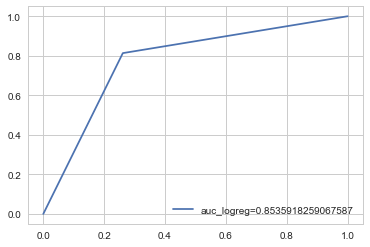


Runtime: 0.91 seconds


In [52]:
# Binary classification using logistics regression
start_time = time.clock()
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Predict using the test set
y_logreg = logreg.predict(X_test)

# Compare scores for train and test sets
print('Training set score:', logreg.score(X_train, y_train))
print('\nTest set score:', logreg.score(X_test, y_test))

# Ten fold cross validation score to evaluate the model 
score_logreg = cross_val_score(logreg, X, Y, cv=10)
print(score_logreg)

#Confusion matrix for logistics regression classifier
print('Confusion matrix')
print(confusion_matrix(y_test, y_logreg))

# Classification report 
print(classification_report(y_test, y_logreg))

# AUC classifier
y_logreg_proba = logreg.predict_proba(X_test)[::,1]
fpr_logreg, tpr_logreg, _ = metrics.roc_curve(y_test,  y_logreg)
auc_logreg = metrics.roc_auc_score(y_test, y_logreg_proba)
plt.plot(fpr_logreg,tpr_logreg,label='auc_logreg='+str(auc_logreg))
plt.legend(loc=4)
plt.show()
print('\nRuntime: {} seconds'.format(round((time.clock()-start_time),2)))

Logistic regression requires the observations to be independent of each other. As discussed previously some of our categorical variables might have dependencies. Logistics regression works best with high sample size. In our case the trainig score has a better score than the test score.   

## 4. Ridge Classifier

In [53]:
# Ridge classifier
start_time = time.clock()
ridge = RidgeClassifier()
ridge.fit(X_train, y_train)

y_ridge = ridge.predict(X_test)

# Evaluations
score_ridge = cross_val_score(ridge, X, Y, cv=10)
print(score_ridge)
print('Training set score:', ridge.score(X_train, y_train))
print('\nTest set score:', ridge.score(X_test, y_test))

#Confusion matrix for logistics regression classifier
print('Confusion matrix')
print(confusion_matrix(y_test, y_ridge))

# Classification report 
print(classification_report(y_test, y_ridge)) 

print('\nRuntime: {} seconds'.format(round((time.clock()-start_time),2)))

[0.7575  0.72625 0.755   0.78375 0.75625 0.76875 0.75375 0.735   0.76875
 0.78875]
Training set score: 0.7582142857142857

Test set score: 0.7725
Confusion matrix
[[874 320]
 [226 980]]
             precision    recall  f1-score   support

          0       0.79      0.73      0.76      1194
          1       0.75      0.81      0.78      1206

avg / total       0.77      0.77      0.77      2400


Runtime: 0.19 seconds


The regularization parameter in Ridge and Lasso minimizes the cost function, such that values predicted are much closer to the desired result. We have 44 columns in our data, ridge is more suited to datasets involving too many columns and and variables with high multicoliarity. The two models did not improve the results we get from KNN classifier and logistics regression. 

## 5. Lasso (Logistics regression with L1 regularization parameter)

Training set score: 0.7580357142857143

Test set score: 0.7754166666666666
[0.76125 0.725   0.75375 0.785   0.75875 0.77625 0.76625 0.745   0.77625
 0.79   ]
Confusion matrix
[[882 312]
 [227 979]]
             precision    recall  f1-score   support

          0       0.80      0.74      0.77      1194
          1       0.76      0.81      0.78      1206

avg / total       0.78      0.78      0.78      2400



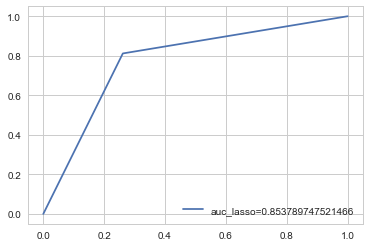


Runtime: 3.26 seconds


In [54]:

start_time = time.clock()
lasso = LogisticRegression(penalty='l1')
lasso.fit(X_train, y_train)

y_lasso = lasso.predict(X_test)

# Evaluations
print('Training set score:', lasso.score(X_train, y_train))
print('\nTest set score:', lasso.score(X_test, y_test))

score_lasso = cross_val_score(lasso, X, Y, cv=10)
print(score_lasso)

#Confusion matrix for logistics regression classifier
print('Confusion matrix')
print(confusion_matrix(y_test, y_lasso))

# Classification report 
print(classification_report(y_test, y_lasso))

# AUC
y_lasso_proba = lasso.predict_proba(X_test)[::,1]
fpr_lasso, tpr_lasso, _ = metrics.roc_curve(y_test,  y_lasso)
auc_lasso = metrics.roc_auc_score(y_test, y_lasso_proba)
plt.plot(fpr_lasso,tpr_lasso,label='auc_lasso='+str(auc_lasso))
plt.legend(loc=4)
plt.show()
print('\nRuntime: {} seconds'.format(round((time.clock()-start_time),2)))

## 6. Decision Tree Classifier

tree_para: {'criterion': 'entropy', 'max_depth': 40}
Training set score: 0.9980357142857142

Test set score: 0.8445833333333334
[0.85625 0.85    0.8475  0.86375 0.8575  0.86125 0.85    0.8525  0.8675
 0.87625]
Confusion matrix
[[ 930  264]
 [ 109 1097]]
             precision    recall  f1-score   support

          0       0.90      0.78      0.83      1194
          1       0.81      0.91      0.85      1206

avg / total       0.85      0.84      0.84      2400



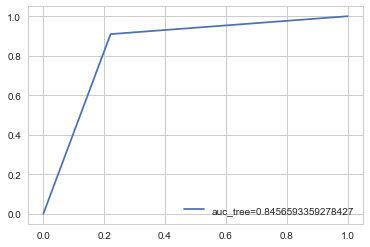


Runtime: 20.01 seconds


In [55]:
# Decision tree using GridSearchCV parameters
start_time = time.clock()
tree_para = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150,200,300,350,400,500]}
tree = GridSearchCV(DecisionTreeClassifier(), tree_para, cv=10)
grid_fit = tree.fit(X_train, y_train)

best_tree = grid_fit.best_estimator_
y_tree = best_tree.predict(X_test)

#print best parameters
print('tree_para:', tree.best_params_)

# Evaluations
print('Training set score:', best_tree.score(X_train, y_train))
print('\nTest set score:', best_tree.score(X_test, y_test))

score_tree = cross_val_score(best_tree, X, Y, cv=10)
print(score_tree)

#Confusion matrix for decision tree
print('Confusion matrix')
print(confusion_matrix(y_test, y_tree))

# Classification report 
print(classification_report(y_test, y_tree))

# AUC for decision tree classifier
y_tree_proba = best_tree.predict_proba(X_test)[::,1]
fpr_tree, tpr_tree, _ = metrics.roc_curve(y_test,  y_tree)
auc_tree = metrics.roc_auc_score(y_test, y_tree_proba)
plt.plot(fpr_tree,tpr_tree,label='auc_tree='+str(auc_tree))
plt.legend(loc=4)
plt.show()
print('\nRuntime: {} seconds'.format(round((time.clock()-start_time),2)))

Here we have used GridSearchCV to tune the maximum depth of the tree. The training set score is 99.8 which suggests that the model might be overfitting. We have upsampled the minority class of our outcome variable and the model seems to pick up that signal. Trees are built from information gain and our minority class was upsampled from 1869 records to 4000. This could dominate the signal. This possibility is supported by the classification report which shows a recall of 78% for the majority class (that we coded 0) verses 91% for the minority class.    

## 7. Random Forest

forest_para: {'criterion': 'gini', 'max_depth': 30, 'n_estimators': 250}
[0.89375 0.87875 0.86375 0.91125 0.8675  0.895   0.875   0.89125 0.90375
 0.89625]
Confusion matrix
[[ 969  225]
 [  90 1116]]
             precision    recall  f1-score   support

          0       0.92      0.81      0.86      1194
          1       0.83      0.93      0.88      1206

avg / total       0.87      0.87      0.87      2400



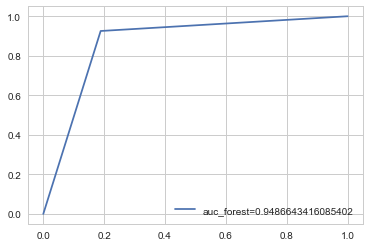


Runtime: 3905.52 seconds


In [56]:
# Random forest with GridsearchCV
start_time = time.clock()
forest_para = {'criterion':['gini','entropy'],'n_estimators':[10,20,50,70,100,250,400,500],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150, 200,300,400,500]}
forest = GridSearchCV(ensemble.RandomForestClassifier(), forest_para, cv=10)
grid_fit_forest = forest.fit(X_train, y_train)

best_forest = grid_fit_forest.best_estimator_
y_forest = best_forest.predict(X_test)

#Print best parameters
print('forest_para:', forest.best_params_)

# Evaluations
score_forest = cross_val_score(best_forest, X, Y, cv=10)
print(score_forest)

#Confusion matrix for random forest
print('Confusion matrix')
print(confusion_matrix(y_test, y_forest))

# Classification report 
print(classification_report(y_test, y_forest))

# AUC for random forest classifier
y_forest_proba = forest.predict_proba(X_test)[::,1]
fpr_forest, tpr_forest, _ = metrics.roc_curve(y_test,  y_forest)
auc_forest = metrics.roc_auc_score(y_test, y_forest_proba)
plt.plot(fpr_forest,tpr_forest,label='auc_forest='+str(auc_forest))
plt.legend(loc=4)
plt.show()
print('\nRuntime: {} seconds'.format(round((time.clock()-start_time),2)))

In [112]:
print(score_forest.mean())

0.8714999999999999


Random forest has improved the performance gained from decision tree. The model was able to reduce the error by agrigating votes from many trees. The difference in the recall rate for both churn and not churn classes is smaller thatn the decision tree model. The false negative and false positive numbers have also decreased. Our random forest took 65 minutes to run. Decision tree is better suited for quick prediction. 

## 8. Support Vector Classifier (SVC)

[0.89375 0.87875 0.86375 0.91125 0.8675  0.895   0.875   0.89125 0.90375
 0.89625]
Training set score: 0.9858928571428571

Test set score: 0.8641666666666666
Confusion matrix
[[1005  189]
 [ 137 1069]]
             precision    recall  f1-score   support

          0       0.88      0.84      0.86      1194
          1       0.85      0.89      0.87      1206

avg / total       0.86      0.86      0.86      2400



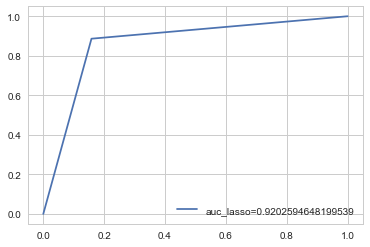


Runtime: 17814.08 seconds


In [57]:
# Set the parameters by cross-validation
# reference http://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html
start_time = time.clock()
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['rbf'], 'C': [1, 10, 100, 500]}]
clf = GridSearchCV(SVC(probability=True), tuned_parameters, cv=5)
clf.fit(X_train, y_train)

clf.best_params_

#best_forest = grid_fit_forest.best_estimator_
y_svc = clf.predict(X_test)

# Evaluations
score_clf = cross_val_score(clf, X, Y, cv=10)
print(score_forest)

print('Training set score:', clf.score(X_train, y_train))
print('\nTest set score:', clf.score(X_test, y_test))

#Confusion matrix for logistics regression classifier
print('Confusion matrix')
print(confusion_matrix(y_test, y_svc))

# Classification report 
print(classification_report(y_test, y_svc))

# AUC
y_svc_proba = clf.predict_proba(X_test)[::,1]
fpr_clf, tpr_clf, _ = metrics.roc_curve(y_test,  y_svc)
auc_svc = metrics.roc_auc_score(y_test, y_svc_proba)
plt.plot(fpr_clf,tpr_clf,label='auc_lasso='+str(auc_svc))
plt.legend(loc=4)
plt.show()
print('\nRuntime: {} seconds'.format(round((time.clock()-start_time),2)))

SVC handles noise verywell and overfitting might not be a problem. The training set score is high but that is more likely due to the model learning well than overfitting. The test set score is one of the highest we've seen so far. The difference between the recall and precision scores of both classes (churn and not churn) is low which indicates that the model is not biased by the randomly duplicated values of our minority class. 

SVC requires high memory as it processes all data without parallelizing the process. Our model took 297 minutes (~5hrs) to run. 

## 9. Gradient Boost Classification

{'learning_rate': [0.1, 0.05, 0.02, 0.01], 'max_depth': [4, 6, 8], 'min_samples_leaf': [20, 50, 100, 150]}
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=10)]: Done  12 tasks      | elapsed:   56.7s
[Parallel(n_jobs=10)]: Done 108 tasks      | elapsed:  4.8min
[Parallel(n_jobs=10)]: Done 240 out of 240 | elapsed: 11.3min finished


Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=10)]: Done  12 tasks      | elapsed:   44.6s
[Parallel(n_jobs=10)]: Done 108 tasks      | elapsed:  5.1min
[Parallel(n_jobs=10)]: Done 240 out of 240 | elapsed: 12.5min finished


Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=10)]: Done  12 tasks      | elapsed:   44.7s
[Parallel(n_jobs=10)]: Done 108 tasks      | elapsed:  5.0min
[Parallel(n_jobs=10)]: Done 240 out of 240 | elapsed: 12.3min finished


Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=10)]: Done  12 tasks      | elapsed:   45.0s
[Parallel(n_jobs=10)]: Done 108 tasks      | elapsed:  5.1min
[Parallel(n_jobs=10)]: Done 240 out of 240 | elapsed: 12.5min finished


Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=10)]: Done  12 tasks      | elapsed:   44.6s
[Parallel(n_jobs=10)]: Done 108 tasks      | elapsed:  5.1min
[Parallel(n_jobs=10)]: Done 240 out of 240 | elapsed: 12.4min finished


Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=10)]: Done  12 tasks      | elapsed:   45.4s
[Parallel(n_jobs=10)]: Done 108 tasks      | elapsed:  5.1min
[Parallel(n_jobs=10)]: Done 240 out of 240 | elapsed: 12.4min finished


[0.92872109 0.92943281 0.91879922 0.91679766 0.94396875]
Confusion matrix
[[ 961  233]
 [  87 1119]]
             precision    recall  f1-score   support

          0       0.92      0.80      0.86      1194
          1       0.83      0.93      0.87      1206

avg / total       0.87      0.87      0.87      2400



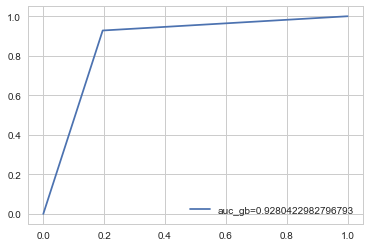


Runtime: 4485.44 seconds


In [58]:
start_time = time.clock()
gb_grid_params = {'learning_rate': [0.1, 0.05, 0.02, 0.01],
              'max_depth': [4, 6, 8],
              'min_samples_leaf': [20, 50,100,150],
              #'max_features': [1.0, 0.3, 0.1] 
              }
print(gb_grid_params)

gb_gs = ensemble.GradientBoostingClassifier(n_estimators = 500)

gb_clf = GridSearchCV(gb_gs,
                   gb_grid_params,
                   cv=5,
                   scoring='roc_auc',
                   verbose = 3,
                   n_jobs=10);
gb_clf.fit(X_train, y_train)
predict_train = gb_clf.predict(X_train)
predict_test = gb_clf.predict(X_test)


# Evaluations
score_gb = cross_val_score(gb_clf, X, Y, cv=5)
print(score_gb)

#Confusion matrix for logistics regression classifier
print('Confusion matrix')
print(confusion_matrix(y_test, predict_test))

# Classification report 
print(classification_report(y_test, predict_test))

# AUC
y_gb_proba = gb_clf.predict_proba(X_test)[::,1]
fpr_gb, tpr_gb, _ = metrics.roc_curve(y_test,  predict_test)
auc_gb = metrics.roc_auc_score(y_test, y_gb_proba)
plt.plot(fpr_gb,tpr_gb,label='auc_gb='+str(auc_gb))
plt.legend(loc=4)
plt.show()
print('\nRuntime: {} seconds'.format(round((time.clock()-start_time),2)))

We used the default diviance loss function and GridSearchCV for parameter tuning. ‘deviance’ refers to deviance (= logistic regression) for classification with probabilistic outputs. The model has improved much from the logistics regression model.

Gradient boost has a slightly better score than some of the best performing models we've seen so far. There is a hint of noise in our data and we will now see if we can handle that better and improve the best performing models using principal component analysis and feature selection. 

# Dimentionality Reduction with PCA and Select K best 

## Principal Component Analysis (PCA) 

We'll apply PCA on some of the best performing models and see if we can improve the accuract

<ul>
    <li>KNN classifier</li>
    <li>Logistics Regression</li>
    <li>Random Forest</li>
    <li>SVC</li>
    <li>Gradient Boost</li>
</ul>

In [60]:
# transform  
X_tra = StandardScaler().fit_transform(X)

In [69]:
# Initiate pca
pca =PCA(n_components=15)

In [70]:
# Fit with selected features
X_pca = pca.fit_transform(X_tra)

# Varience in pca
varience = pca.explained_variance_ratio_.cumsum()
print('Varience expained by principal components:', varience)

Varience expained by principal components: [0.24998677 0.3937739  0.49335947 0.5533125  0.60491172 0.64762737
 0.68485511 0.71882624 0.74995888 0.77810971 0.80613012 0.8336856
 0.8599734  0.88560654 0.90939076]


In [71]:
# Train test split for PCA components
X_train, X_test, y_train, y_test = train_test_split(X_pca, Y, test_size = 0.3, random_state = 42)

## KNN Classifier with PCA 

[0.81875 0.84    0.80875 0.84375 0.815   0.8225  0.815   0.84625 0.84
 0.835  ]
Training set score: 0.9980357142857142

Test set score: 0.8195833333333333
             precision    recall  f1-score   support

          0       0.92      0.70      0.79      1194
          1       0.76      0.94      0.84      1206

avg / total       0.84      0.82      0.82      2400

Confusion matrix
[[ 830  364]
 [  69 1137]]


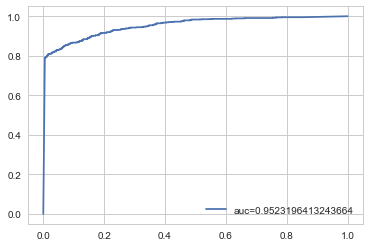


Runtime: 2.98 seconds


In [78]:
# Fit the data to knn model 
start_time = time.clock()
neigh = KNeighborsClassifier(n_neighbors=25, weights='distance')
neigh.fit(X_train, y_train)
y_knn = neigh.predict(X_test)

# score
score_neigh = cross_val_score(neigh, X_pca, Y, cv=10)
print(score_neigh)
print('Training set score:', neigh.score(X_train, y_train))
print('\nTest set score:', neigh.score(X_test, y_test))

# Classification report 
print(classification_report(y_test, y_knn))

#Confusion matrix 
print('Confusion matrix')
print(confusion_matrix(y_test, y_knn))

# AUC 
y_pred_proba = neigh.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label='auc='+str(auc))
plt.legend(loc=4)
plt.show()
print('\nRuntime: {} seconds'.format(round((time.clock()-start_time),2)))

PCA did not improve the scores of our KNN classifier and there is still very high training set score. 

## Logistics Regression with PCA

Training set score: 0.7516071428571428

Test set score: 0.76875
[0.76    0.72625 0.75    0.7725  0.745   0.76    0.75375 0.73875 0.7725
 0.79   ]
Confusion matrix
[[879 315]
 [240 966]]
             precision    recall  f1-score   support

          0       0.79      0.74      0.76      1194
          1       0.75      0.80      0.78      1206

avg / total       0.77      0.77      0.77      2400



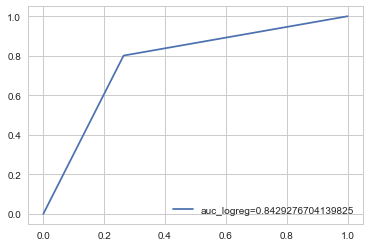


Runtime: 0.35 seconds


In [73]:
# Binary classification using logistics regression
start_time = time.clock()
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Predict using the test set
y_logreg = logreg.predict(X_test)

# Compare scores for train and test sets
print('Training set score:', logreg.score(X_train, y_train))
print('\nTest set score:', logreg.score(X_test, y_test))

# Ten fold cross validation score to evaluate the model 
score_logreg = cross_val_score(logreg, X_pca, Y, cv=10)
print(score_logreg)

#Confusion matrix for logistics regression classifier
print('Confusion matrix')
print(confusion_matrix(y_test, y_logreg))

# Classification report 
print(classification_report(y_test, y_logreg))

# AUC classifier
y_logreg_proba = logreg.predict_proba(X_test)[::,1]
fpr_logreg, tpr_logreg, _ = metrics.roc_curve(y_test,  y_logreg)
auc_logreg = metrics.roc_auc_score(y_test, y_logreg_proba)
plt.plot(fpr_logreg,tpr_logreg,label='auc_logreg='+str(auc_logreg))
plt.legend(loc=4)
plt.show()
print('\nRuntime: {} seconds'.format(round((time.clock()-start_time),2)))

There is a slight decrease in accuracy in this logistics regression model with PCA components. 

## Random Forest with PCA

forest_para: {'criterion': 'gini', 'max_depth': 50, 'n_estimators': 70}
[0.89125 0.88125 0.855   0.88875 0.875   0.8875  0.87625 0.88375 0.88875
 0.87625]
Confusion matrix
[[ 975  219]
 [ 123 1083]]
             precision    recall  f1-score   support

          0       0.89      0.82      0.85      1194
          1       0.83      0.90      0.86      1206

avg / total       0.86      0.86      0.86      2400



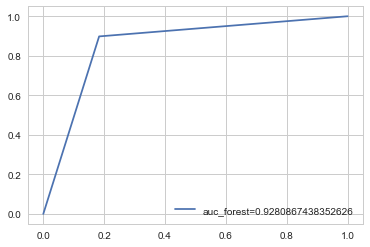


Runtime: 10338.95 seconds


In [74]:
# Random forest with GridsearchCV
start_time = time.clock()
forest_para = {'criterion':['gini','entropy'],'n_estimators':[10,20,50,70,100,250,400,500],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150, 200,300,400,500]}
forest = GridSearchCV(ensemble.RandomForestClassifier(), forest_para, cv=10)
grid_fit_forest = forest.fit(X_train, y_train)

best_forest = grid_fit_forest.best_estimator_
y_forest = best_forest.predict(X_test)

#Print best parameters
print('forest_para:', forest.best_params_)

# Evaluations
score_forest = cross_val_score(best_forest, X_pca, Y, cv=10)
print(score_forest)

#Confusion matrix for random forest
print('Confusion matrix')
print(confusion_matrix(y_test, y_forest))

# Classification report 
print(classification_report(y_test, y_forest))

# AUC for random forest classifier
y_forest_proba = forest.predict_proba(X_test)[::,1]
fpr_forest, tpr_forest, _ = metrics.roc_curve(y_test,  y_forest)
auc_forest = metrics.roc_auc_score(y_test, y_forest_proba)
plt.plot(fpr_forest,tpr_forest,label='auc_forest='+str(auc_forest))
plt.legend(loc=4)
plt.show()
print('\nRuntime: {} seconds'.format(round((time.clock()-start_time),2)))

Like the other models we tried with PCA, random forest too show a 1% decrease in accuracy.  

## Support Vector Classifier (SVC) with PCA 

[0.89125 0.88125 0.855   0.88875 0.875   0.8875  0.87625 0.88375 0.88875
 0.87625]
Training set score: 0.9335714285714286

Test set score: 0.8158333333333333
Confusion matrix
[[ 882  312]
 [ 130 1076]]
             precision    recall  f1-score   support

          0       0.87      0.74      0.80      1194
          1       0.78      0.89      0.83      1206

avg / total       0.82      0.82      0.81      2400



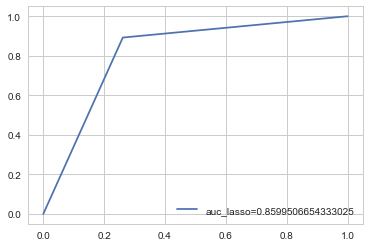


Runtime: 5486.16 seconds


In [75]:
# Set the parameters by cross-validation
# reference http://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html
start_time = time.clock()
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['rbf'], 'C': [1, 10, 100, 500]}]
clf = GridSearchCV(SVC(probability=True), tuned_parameters, cv=5)
clf.fit(X_train, y_train)

clf.best_params_

#best_forest = grid_fit_forest.best_estimator_
y_svc = clf.predict(X_test)

# Evaluations
score_clf = cross_val_score(clf, X_pca, Y, cv=10)
print(score_forest)

print('Training set score:', clf.score(X_train, y_train))
print('\nTest set score:', clf.score(X_test, y_test))

#Confusion matrix for logistics regression classifier
print('Confusion matrix')
print(confusion_matrix(y_test, y_svc))

# Classification report 
print(classification_report(y_test, y_svc))

# AUC
y_svc_proba = clf.predict_proba(X_test)[::,1]
fpr_clf, tpr_clf, _ = metrics.roc_curve(y_test,  y_svc)
auc_svc = metrics.roc_auc_score(y_test, y_svc_proba)
plt.plot(fpr_clf,tpr_clf,label='auc_lasso='+str(auc_svc))
plt.legend(loc=4)
plt.show()
print('\nRuntime: {} seconds'.format(round((time.clock()-start_time),2)))

In addition to reducing the run time significantly, SVC with PCA seem to have delt with the noise well. The training set score is not close to 1 like the previous model. The false positive and false negative numbers have dropped but the overall precision and recall have decreased. 

## Gradient Boost Classifier with PCA 

{'learning_rate': [0.1, 0.05, 0.02, 0.01], 'max_depth': [4, 6, 8], 'min_samples_leaf': [20, 50, 100, 150]}
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=10)]: Done  12 tasks      | elapsed:   59.0s
[Parallel(n_jobs=10)]: Done 108 tasks      | elapsed:  5.2min
[Parallel(n_jobs=10)]: Done 240 out of 240 | elapsed: 11.2min finished


Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=10)]: Done  12 tasks      | elapsed:   53.0s
[Parallel(n_jobs=10)]: Done 108 tasks      | elapsed:  5.7min
[Parallel(n_jobs=10)]: Done 240 out of 240 | elapsed: 12.7min finished


Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=10)]: Done  12 tasks      | elapsed:   51.7s
[Parallel(n_jobs=10)]: Done 108 tasks      | elapsed:  5.7min
[Parallel(n_jobs=10)]: Done 240 out of 240 | elapsed: 12.6min finished


Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=10)]: Done  12 tasks      | elapsed:   51.5s
[Parallel(n_jobs=10)]: Done 108 tasks      | elapsed:  5.7min
[Parallel(n_jobs=10)]: Done 240 out of 240 | elapsed: 12.6min finished


Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=10)]: Done  12 tasks      | elapsed:   51.9s
[Parallel(n_jobs=10)]: Done 108 tasks      | elapsed:  5.6min
[Parallel(n_jobs=10)]: Done 240 out of 240 | elapsed: 12.1min finished


Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=10)]: Done  12 tasks      | elapsed:   47.6s
[Parallel(n_jobs=10)]: Done 108 tasks      | elapsed:  5.3min
[Parallel(n_jobs=10)]: Done 240 out of 240 | elapsed: 11.7min finished


[0.93680234 0.92357344 0.93288672 0.92189922 0.94178359]
Confusion matrix
[[ 959  235]
 [ 116 1090]]
             precision    recall  f1-score   support

          0       0.89      0.80      0.85      1194
          1       0.82      0.90      0.86      1206

avg / total       0.86      0.85      0.85      2400



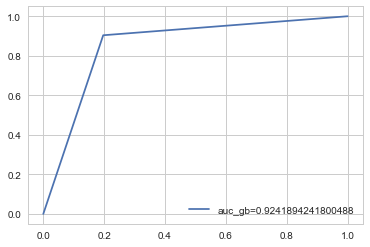


Runtime: 4449.56 seconds


In [76]:
start_time = time.clock()
gb_grid_params = {'learning_rate': [0.1, 0.05, 0.02, 0.01],
              'max_depth': [4, 6, 8],
              'min_samples_leaf': [20, 50,100,150],
              #'max_features': [1.0, 0.3, 0.1] 
              }
print(gb_grid_params)

gb_gs = ensemble.GradientBoostingClassifier(n_estimators = 500)

gb_clf = GridSearchCV(gb_gs,
                   gb_grid_params,
                   cv=5,
                   scoring='roc_auc',
                   verbose = 3,
                   n_jobs=10);
gb_clf.fit(X_train, y_train)
predict_train = gb_clf.predict(X_train)
predict_test = gb_clf.predict(X_test)


# Evaluations
score_gb = cross_val_score(gb_clf, X_pca, Y, cv=5)
print(score_gb)

#print('Training set score:', gb_clf.score(X_train, y_train))
#print('\nTest set score:', gb_clf.score(X_test, y_test))

#Confusion matrix for logistics regression classifier
print('Confusion matrix')
print(confusion_matrix(y_test, predict_test))

# Classification report 
print(classification_report(y_test, predict_test))

# AUC
y_gb_proba = gb_clf.predict_proba(X_test)[::,1]
fpr_gb, tpr_gb, _ = metrics.roc_curve(y_test,  predict_test)
auc_gb = metrics.roc_auc_score(y_test, y_gb_proba)
plt.plot(fpr_gb,tpr_gb,label='auc_gb='+str(auc_gb))
plt.legend(loc=4)
plt.show()
print('\nRuntime: {} seconds'.format(round((time.clock()-start_time),2)))

PCA also failed to deliver an improved result on gradient boost. Now let's look at SelectKbest feature selection. 

## Select K Best

We'll use select k best feature selection on some of the best performing models and see if we can improve the accuracy and reduce the run time. 
<ul>
    <li>KNN classifier</li>
    <li>Logistics Regression</li>
    <li>Random Forest</li>
    <li>SVC</li>
    <li>Gradient Boost</li>
</ul>

In [79]:
# Select 20 of the 44 features based on chi2 test to reduce processing time 
# This gave the best result after many trials 
#from sklearn.feature_selection import chi2
selection = SelectKBest(score_func=chi2, k=15)
X_kbest = selection.fit(X, Y).transform(X)

In [100]:
# Split training and testing data 
X_train, X_test, y_train, y_test = train_test_split(X_kbest, Y, test_size = 0.3, random_state = 42)

## KNN Classifier with feature selection

[0.8425  0.8375  0.83125 0.85875 0.82    0.83875 0.8325  0.8375  0.83375
 0.85   ]
Training set score: 0.9926785714285714

Test set score: 0.8379166666666666
             precision    recall  f1-score   support

          0       0.92      0.74      0.82      1194
          1       0.78      0.94      0.85      1206

avg / total       0.85      0.84      0.84      2400

Confusion matrix
[[ 883  311]
 [  78 1128]]


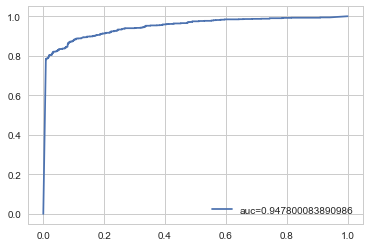


Runtime: 0.65 seconds


In [101]:
# Fit the data to knn model 
start_time = time.clock()
neigh = KNeighborsClassifier(n_neighbors=25, weights='distance')
neigh.fit(X_train, y_train)
y_knn = neigh.predict(X_test)

# score
score_neigh = cross_val_score(neigh, X_kbest, Y, cv=10)
print(score_neigh)
print('Training set score:', neigh.score(X_train, y_train))
print('\nTest set score:', neigh.score(X_test, y_test))

# Classification report 
print(classification_report(y_test, y_knn))

#Confusion matrix 
print('Confusion matrix')
print(confusion_matrix(y_test, y_knn))

# AUC 
y_pred_proba = neigh.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label='auc='+str(auc))
plt.legend(loc=4)
plt.show()
print('\nRuntime: {} seconds'.format(round((time.clock()-start_time),2)))

Exactly the same score as the original model. 

## Logistics Regression with feature selection 

Training set score: 0.7501785714285715

Test set score: 0.7691666666666667
[0.755   0.7275  0.74    0.78125 0.76125 0.7575  0.755   0.74375 0.76375
 0.77375]
Confusion matrix
[[860 334]
 [220 986]]
             precision    recall  f1-score   support

          0       0.80      0.72      0.76      1194
          1       0.75      0.82      0.78      1206

avg / total       0.77      0.77      0.77      2400



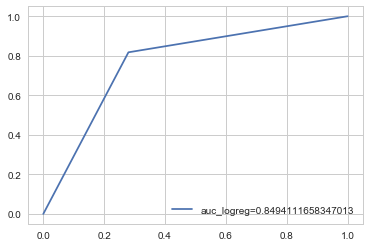


Runtime: 0.6 seconds


In [82]:
# Binary classification using logistics regression
start_time = time.clock()
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Predict using the test set
y_logreg = logreg.predict(X_test)

# Compare scores for train and test sets
print('Training set score:', logreg.score(X_train, y_train))
print('\nTest set score:', logreg.score(X_test, y_test))

# Ten fold cross validation score to evaluate the model 
score_logreg = cross_val_score(logreg, X_kbest, Y, cv=10)
print(score_logreg)

#Confusion matrix for logistics regression classifier
print('Confusion matrix')
print(confusion_matrix(y_test, y_logreg))

# Classification report 
print(classification_report(y_test, y_logreg))

# AUC classifier
y_logreg_proba = logreg.predict_proba(X_test)[::,1]
fpr_logreg, tpr_logreg, _ = metrics.roc_curve(y_test,  y_logreg)
auc_logreg = metrics.roc_auc_score(y_test, y_logreg_proba)
plt.plot(fpr_logreg,tpr_logreg,label='auc_logreg='+str(auc_logreg))
plt.legend(loc=4)
plt.show()
print('\nRuntime: {} seconds'.format(round((time.clock()-start_time),2)))

Slightly lower precision and recall. no advantage gained from select k best

## Random Forest with Feature Selection 

forest_para: {'criterion': 'gini', 'max_depth': 70, 'n_estimators': 400}
[0.87875 0.86625 0.8625  0.88875 0.85375 0.86875 0.85875 0.8675  0.88
 0.89   ]
Confusion matrix
[[ 975  219]
 [ 114 1092]]
             precision    recall  f1-score   support

          0       0.90      0.82      0.85      1194
          1       0.83      0.91      0.87      1206

avg / total       0.86      0.86      0.86      2400



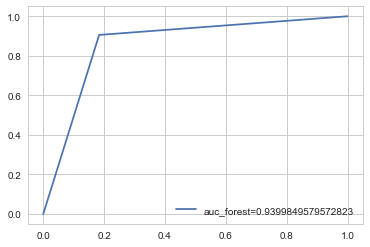


Runtime: 3675.58 seconds


In [83]:
# Random forest with GridsearchCV
start_time = time.clock()
forest_para = {'criterion':['gini','entropy'],'n_estimators':[10,20,50,70,100,250,400,500],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150, 200,300,400,500]}
forest = GridSearchCV(ensemble.RandomForestClassifier(), forest_para, cv=10)
grid_fit_forest = forest.fit(X_train, y_train)

best_forest = grid_fit_forest.best_estimator_
y_forest = best_forest.predict(X_test)

#Print best parameters
print('forest_para:', forest.best_params_)

# Evaluations
score_forest = cross_val_score(best_forest, X_kbest, Y, cv=10)
print(score_forest)

#Confusion matrix for random forest
print('Confusion matrix')
print(confusion_matrix(y_test, y_forest))

# Classification report 
print(classification_report(y_test, y_forest))

# AUC for random forest classifier
y_forest_proba = forest.predict_proba(X_test)[::,1]
fpr_forest, tpr_forest, _ = metrics.roc_curve(y_test,  y_forest)
auc_forest = metrics.roc_auc_score(y_test, y_forest_proba)
plt.plot(fpr_forest,tpr_forest,label='auc_forest='+str(auc_forest))
plt.legend(loc=4)
plt.show()
print('\nRuntime: {} seconds'.format(round((time.clock()-start_time),2)))

Slightly lower performance. No advantage from select K best 

## SVC with Feature Selection 

[0.87875 0.86625 0.8625  0.88875 0.85375 0.86875 0.85875 0.8675  0.88
 0.89   ]
Training set score: 0.9810714285714286

Test set score: 0.8766666666666667
Confusion matrix
[[1063  131]
 [ 165 1041]]
             precision    recall  f1-score   support

          0       0.87      0.89      0.88      1194
          1       0.89      0.86      0.88      1206

avg / total       0.88      0.88      0.88      2400



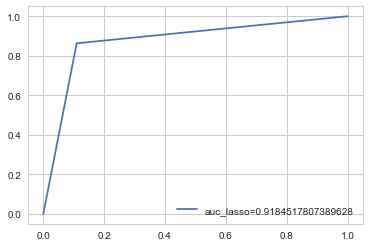


Runtime: 20025.72 seconds


In [84]:
# Set the parameters by cross-validation
# reference http://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html
start_time = time.clock()
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['rbf'], 'C': [1, 10, 100, 500]}]
clf = GridSearchCV(SVC(probability=True), tuned_parameters, cv=5)
clf.fit(X_train, y_train)

clf.best_params_

#best_forest = grid_fit_forest.best_estimator_
y_svc = clf.predict(X_test)

# Evaluations
score_clf = cross_val_score(clf, X_kbest, Y, cv=10)
print(score_forest)

print('Training set score:', clf.score(X_train, y_train))
print('\nTest set score:', clf.score(X_test, y_test))

#Confusion matrix for logistics regression classifier
print('Confusion matrix')
print(confusion_matrix(y_test, y_svc))

# Classification report 
print(classification_report(y_test, y_svc))

# AUC
y_svc_proba = clf.predict_proba(X_test)[::,1]
fpr_clf, tpr_clf, _ = metrics.roc_curve(y_test,  y_svc)
auc_svc = metrics.roc_auc_score(y_test, y_svc_proba)
plt.plot(fpr_clf,tpr_clf,label='auc_lasso='+str(auc_svc))
plt.legend(loc=4)
plt.show()
print('\nRuntime: {} seconds'.format(round((time.clock()-start_time),2)))

SVC with feature selection has improved the model with better cross validation, precision, and recall scores.  

## Gradient Boost Classifier with Feature Selection 

{'learning_rate': [0.1, 0.05, 0.02, 0.01], 'max_depth': [4, 6, 8], 'min_samples_leaf': [20, 50, 100, 150]}
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=10)]: Done  12 tasks      | elapsed:   41.4s
[Parallel(n_jobs=10)]: Done 108 tasks      | elapsed:  2.3min
[Parallel(n_jobs=10)]: Done 240 out of 240 | elapsed:  4.9min finished


Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=10)]: Done  12 tasks      | elapsed:   31.8s
[Parallel(n_jobs=10)]: Done 108 tasks      | elapsed:  2.4min
[Parallel(n_jobs=10)]: Done 240 out of 240 | elapsed:  5.3min finished


Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=10)]: Done  12 tasks      | elapsed:   31.9s
[Parallel(n_jobs=10)]: Done 108 tasks      | elapsed:  2.4min
[Parallel(n_jobs=10)]: Done 240 out of 240 | elapsed:  5.3min finished


Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=10)]: Done  12 tasks      | elapsed:   34.2s
[Parallel(n_jobs=10)]: Done 108 tasks      | elapsed:  2.4min
[Parallel(n_jobs=10)]: Done 240 out of 240 | elapsed:  5.4min finished


Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=10)]: Done  12 tasks      | elapsed:   31.9s
[Parallel(n_jobs=10)]: Done 108 tasks      | elapsed:  2.4min
[Parallel(n_jobs=10)]: Done 240 out of 240 | elapsed:  5.4min finished


Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=10)]: Done  12 tasks      | elapsed:   31.6s
[Parallel(n_jobs=10)]: Done 108 tasks      | elapsed:  2.4min
[Parallel(n_jobs=10)]: Done 240 out of 240 | elapsed:  5.3min finished


[0.91421875 0.91798281 0.90358828 0.8971125  0.93073906]
Confusion matrix
[[ 949  245]
 [ 119 1087]]
             precision    recall  f1-score   support

          0       0.89      0.79      0.84      1194
          1       0.82      0.90      0.86      1206

avg / total       0.85      0.85      0.85      2400



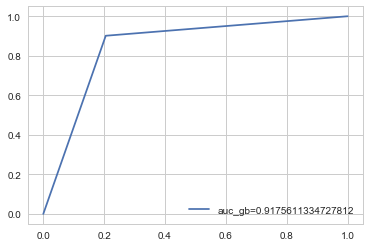


Runtime: 1932.22 seconds


In [85]:
start_time = time.clock()
gb_grid_params = {'learning_rate': [0.1, 0.05, 0.02, 0.01],
              'max_depth': [4, 6, 8],
              'min_samples_leaf': [20, 50,100,150],
              #'max_features': [1.0, 0.3, 0.1] 
              }
print(gb_grid_params)

gb_gs = ensemble.GradientBoostingClassifier(n_estimators = 500)

gb_clf = GridSearchCV(gb_gs,
                   gb_grid_params,
                   cv=5,
                   scoring='roc_auc',
                   verbose = 3,
                   n_jobs=10);
gb_clf.fit(X_train, y_train)
predict_train = gb_clf.predict(X_train)
predict_test = gb_clf.predict(X_test)


# Evaluations
score_gb = cross_val_score(gb_clf, X_kbest, Y, cv=5)
print(score_gb)

#print('Training set score:', gb_clf.score(X_train, y_train))
#print('\nTest set score:', gb_clf.score(X_test, y_test))

#Confusion matrix for logistics regression classifier
print('Confusion matrix')
print(confusion_matrix(y_test, predict_test))

# Classification report 
print(classification_report(y_test, predict_test))

# AUC
y_gb_proba = gb_clf.predict_proba(X_test)[::,1]
fpr_gb, tpr_gb, _ = metrics.roc_curve(y_test,  predict_test)
auc_gb = metrics.roc_auc_score(y_test, y_gb_proba)
plt.plot(fpr_gb,tpr_gb,label='auc_gb='+str(auc_gb))
plt.legend(loc=4)
plt.show()
print('\nRuntime: {} seconds'.format(round((time.clock()-start_time),2)))

Slightly lower performance. No advantage from select K best 

### Feature importance 

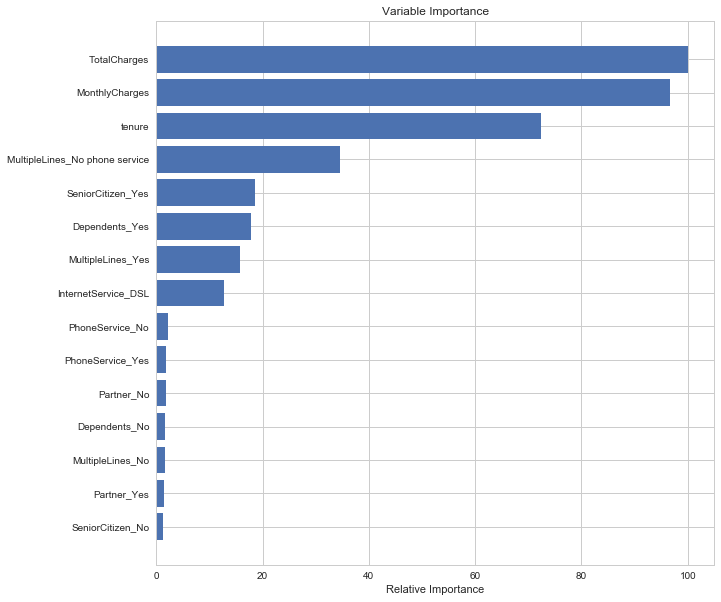

In [111]:
feature_importance = best_forest.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

## Summary and Conclusion

We have used a total of eight models at the start. KNN, Random Forest ,SVM, and Gradient Boost models have returned a higher accuracy score than the rest. However, there is little difference among the high performing models. SVM, and Gradint Boost require a much higher runtime. <b>Random Forest Classifier</b> with original features gives the best result with reasonable run time and that would be the recommended model for this problem. 

We have seen in the data visualization that some of the customer attributes are likely to be good indicators of customer churn. The variable importance graph from the random forest model confirms that the following attributes have a big say on wheter customers will churn or not:

<ol>
  <li>Total Charge</li>
  <li>Monthly Charge</li>
  <li>Tenure</li>
  <li>Whether they have phone service or not</li>
  <li>Whether the customer is senior citezen</li>
  <li>Whether the customer has dependents</li>
  <li>Whether the customer has multiple lines</li>
    
</ol>

The total and monthly charges are higher in customers who are leaving and one way to reduce the churn rate would be to look in to alternative business models to reduce charge. It might also mean that the competition is offering similar services for less. 

Customers who churn have a shorter tenure. Since there are many customers around the first few months of tenure, it will be a good idea to provide incentives for loyalty. It looks like customers who do not have dependents find it easier to leave. The decision to leave the business might be a bit more difficult if other people in the family have influence. Providing a family focused service will help keep customers. 

The models we fit with original features performed better than models with principal components or selected features. We have used GridSearchCV to tune parameters in Decision Tree, Random Forest, SVM, and Gradient Boost models. 

**Shortcomings of Model**

The size of data is not big enough. Fixing the class imbalance will also have affecte the data. 